In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from data_work import data_split
from data_work import processed
from data_work import analyse_dataset
from data_work import set_data
from sklearn.model_selection import train_test_split
import pandas as pd
data=pd.read_csv("E:\App\Git\\repos\Federated Learning\\2022_SE03\data\processed_20k.csv",index_col=None)

In [4]:
data

,subcategory,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category
0,7,188809,130743,0,6,5,12626,37,6775,5,...,50611,5,0,142,0,17552,25490,0,1,1
1,6,243306,194056,10,5,8,47412,34,6775,1,...,0,1,0,121,0,2373,3683,0,1,0
2,7,143289,99255,0,6,5,51883,37,6775,5,...,48186,5,0,142,0,13025,21877,0,1,1
3,4,85020,74004,0,5,5,56325,40,3137,1,...,296,0,1,1,2,58423,0,0,1,3
4,1,130584,153341,0,5,10,58481,28,4782,2,...,13833,0,2,5,16,1201,0,278,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260602,6,256290,206910,10,5,8,58871,34,6775,1,...,0,1,0,121,0,2438,3722,0,1,0
260603,5,22173,20523,0,5,5,41366,34,3031,12,...,27201,6,6,250,181,48611,40558,33850,1,3
260604,7,147386,102715,11,6,7,21276,39,6775,4,...,54385,4,0,119,0,9595,17113,0,1,1
260605,6,254103,204723,10,5,8,58341,34,6775,1,...,0,1,0,121,0,2447,3731,0,1,0


In [5]:

traindata,test_data=train_test_split(data,test_size=0.4,random_state=42,stratify=data['subcategory '])
data = traindata.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
client_data,server_data=train_test_split(traindata,test_size=0.01,random_state=42)
client_data = client_data.reset_index(drop=True)
server_data = server_data.reset_index(drop=True)

In [6]:
test_data

,subcategory,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category
0,1,125776,148533,0,5,5,37388,34,6776,9,...,75,5,4,548,213,27606,22439,14614,1,1
1,1,194760,216462,0,5,7,37681,40,6776,9,...,34297,5,4,576,321,7574,4679,12615,1,0
2,1,202505,224198,0,5,6,32595,34,6776,9,...,90,5,4,479,213,27064,21682,17642,1,0
3,5,18262,16727,0,5,5,45878,34,1270,1,...,381,0,1,1,2,58249,0,0,1,3
4,1,206166,227869,0,5,16,58481,30,5116,2,...,14489,0,2,5,16,1334,0,328,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104238,1,137401,160158,0,5,6,49539,34,6775,4,...,291,2,2,272,19,59150,46704,38409,1,1
104239,4,98576,85427,0,5,8,48535,39,2127,1,...,28,0,1,1,2,59387,0,0,1,3
104240,4,65827,57775,10,5,7,54084,39,4424,9,...,28535,5,4,341,78,41384,35998,29524,1,3
104241,7,141957,98045,0,6,6,41124,34,6775,23,...,56192,23,0,1031,0,36824,35681,0,1,1


In [7]:
server_data

,subcategory,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,...,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category
0,5,8636,7694,11,6,6,20689,34,1849,0,...,36,0,0,1,0,0,0,0,1,3
1,6,221514,172873,8,5,5,59772,34,6775,5,...,29867,3,2,174,14,31728,26909,6817,1,0
2,1,207906,229608,0,5,7,51415,40,6775,9,...,34069,5,4,752,321,13752,9180,12768,1,0
3,4,63944,55893,0,5,8,36828,39,1750,1,...,30,0,1,1,2,59379,0,0,1,3
4,5,32874,30196,0,5,8,13889,34,1212,0,...,0,0,0,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,4,79140,68363,0,5,7,52414,39,1669,2,...,160,1,1,41,2,59113,46673,0,1,3
1560,4,89218,77604,0,5,5,17946,34,5835,1,...,6,0,1,1,2,59444,0,0,1,3
1561,7,155061,108721,0,6,7,25849,39,6775,4,...,54064,4,0,119,0,9895,17411,0,1,1
1562,7,178003,122904,0,6,5,8332,37,6775,5,...,49181,5,0,142,0,16072,24592,0,1,1


In [8]:
trainloaders,testloaders=data_split(client_data,"subcategory ",10,0.1,IID=0)

prepairing non IID dataset
len of client data :154800, len of each subdata : 15480
client number 1 : train(13932), val(1548)
client number 2 : train(13932), val(1548)
client number 3 : train(13932), val(1548)
client number 4 : train(13932), val(1548)
client number 5 : train(13932), val(1548)
client number 6 : train(13932), val(1548)
client number 7 : train(13932), val(1548)
client number 8 : train(13932), val(1548)
client number 9 : train(13932), val(1548)
client number 10 : train(13932), val(1548)


In [9]:
import torch
for i in range(len(trainloaders)):
    trainloaders[i]=torch.tensor(trainloaders[i].values)

In [8]:
from model import Net
from CGan import CGAN
class Argument():
    def __init__(self,data):
        self.noise_size=5
        self.n_features=28
        self.n_classes=8
        self.epoch=10
        self.batch_size=32
        self.dataset=data #tensor
        self.lrG=0.003
        self.lrD=0.003 

In [10]:
class client():
    def __init__(self,cid):
       self.cid=cid
       self.trainset=trainloaders[self.cid] #tensor
       self.testset=testloaders[self.cid] #tensor
       self.labels = torch.unique(self.trainset[:,:1].squeeze())
       self.synthentic_data = None
       args=Argument(self.trainset) #customs

       self.Gan=CGAN(args)
       self.model=Net(0.00)
       
    def update_model(self,params):
        self.model.load_parameters(params)
    def update_Gan(self,params):
        self.Gan.load_parameters(params)
    def Gan_fit(self,data):
        self.Gan.train(data)
        #code Generator fit data
    def model_fit(self,data):
        if len(data)!=0:
            X=data[:,1:].float()
            y=data[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        else:
            X=self.trainset[:,1:].float()
            y=self.trainset[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        self.model.fit(X,y,0.003,0.2,10)
        #model classify fit
    def get_parameters(self):
        D_parameters,G_parameters=self.Gan.get_parameters()
        M_parameters=self.model.get_parameters()
        return M_parameters,D_parameters, G_parameters
    def evaluate(self):
        X=self.testset[:,1:].float()
        y=self.testset[:,:1]
        y=y.squeeze().tolist()
        y=torch.tensor(y).ft()
        accuracy=self.model.evaluate(X,y)
        return accuracy

In [11]:
def fn_client(cid)->client:
    return client(cid)

In [12]:
class server():
    def __init__(self):
       self.trainset=torch.tensor(server_data.values) #tensor
       self.testset=torch.tensor(test_data.values) #tensor
       self.synthetis_data = None
       args=Argument(self.trainset) #customs

       self.Gan=CGAN(args)
       self.model=Net(0.00)
          
    def update_model(self,params):
        self.model.load_parameters(params)
    def update_Gan(self,params):
        self.Gan.load_parameters(params)
    def Gan_freedata_fit(self):
        self.Gan.freedata_train(self.model)
        #code Generator fit data
    def model_fit(self,data):
        if len(data)!=0:
            X=data[:,1:].float()
            y=data[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        else:
            X=self.trainset[:,1:].float()
            y=self.trainset[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        self.model.fit(X,y,0.003,0.2,100)
    def get_parameters(self):
        D_parameters,G_parameters=self.Gan.get_parameters()
        M_parameters=self.model.get_parameters()
        return M_parameters,D_parameters, G_parameters
    def evaluate(self):
        X=self.testset[:,1:].float()
        y=self.testset[:,:1]
        y=y.squeeze().tolist()
        y=torch.tensor(y).long()
        accuracy=self.model.evaluate(X,y)
        return accuracy
    def Gen_fake(self,n_samples):
        y=torch.randint(0, 8, (n_samples,))
        y=y.squeeze()
        return self.Gan.sample(y,n_samples)


In [13]:
class Federated_Learning():
    def __init__(self):
        self.server=server()
        self.testset=torch.tensor(test_data.values)
        self.clients=[]
        self.n_clients=8
        for i in range(self.n_clients):
            cl=fn_client(i)
            self.clients.append(cl)
    def client_M_update(self):
        M_params=self.server.model.get_parameters()
        for i in range(self.n_clients):
            self.clients[i].update_model(M_params)
    def server_M_update(self):
        params=self.clients[0].model.get_parameters()
        for i in range(len(params)):
            for k in range(1,self.n_clients):
                params[i]=params[i]+self.clients[k].model.get_parameters()[i]
            params[i]=params[i]/self.n_clients
        self.server.update_model(params)
        print("finished AVG model")

    # def get_synthentic_clients_data(self): 
    #     for i in range(self.n_clients): 
    #         self.server.synthentic_data=torch.cat(self.server.synthentic_data, self.clents[i].synthetic_data)
            
    def free_data_simulation(self,rounds):
        accuracy_hist=[]

        # #Client's training and creating synthentic data 
        # for round in range(rounds): 
        #     for i in range(self.n_clients):
        #         fit_data=torch.cat((self.clients[i].trainset,self.server.synthentic_data),dim=0)
        #         print(f"processing client {i}")
        #         fit_data=fit_data.detach()
        #         self.clients[i].model_fit(fit_data)
        #         self.clients[i].Gan_freedata_fit()
        #         self.clents[i].synthetic_data = self.clients[i].Gen_fake(1000000)
        #         self.server.trainset=torch.cat(self.server.synthentic_data, self.clents[i].synthetic_data)

        # #Processing Server
        # self.server_M_update()
        self.server.model_fit([])
        loss,accuracy=self.server.evaluate()
        print(f"initial server model, accuracy: {accuracy}, loss: {loss}")
        total_syntheticdata=self.server.trainset
        for round in range(rounds):
            self.server.Gan_freedata_fit()
            f=self.server.Gen_fake(20000)
            total_syntheticdata=torch.cat((total_syntheticdata,f),dim=0).detach()
            print(f"-------------ready for round {round}-------------")
            self.client_M_update()
            round_fake_data=f
            round_fake_data.detach()
            print(f"complete to update client's M model")
            for i in range(self.n_clients):
                fit_data=torch.cat((self.clients[i].trainset,round_fake_data),dim=0)
                print(f"processing client {i}")
                fit_data=fit_data.detach()
                self.clients[i].model_fit(fit_data)
            self.server_M_update()
            loss,accuracy=self.server.evaluate()
            accuracy_hist.append(accuracy)
            print(f"round {round} accuracy for server: {accuracy}")

        loss,accuracy=self.server.evaluate()
        print(f"----------last accuracy {accuracy} ----------")
        return accuracy_hist
    
        

 
                

In [14]:
ser=Federated_Learning()
acc=ser.free_data_simulation(15)

initial setup for free data training
accuracy of epoch 0 is 0.26198083067092653
accuracy of epoch 1 is 0.03194888178913738
accuracy of epoch 2 is 0.3738019169329074
accuracy of epoch 3 is 0.16293929712460065
accuracy of epoch 4 is 0.24920127795527156
accuracy of epoch 5 is 0.2012779552715655
accuracy of epoch 6 is 0.18210862619808307
accuracy of epoch 7 is 0.5047923322683706
accuracy of epoch 8 is 0.5239616613418531
accuracy of epoch 9 is 0.6230031948881789
accuracy of epoch 10 is 0.7092651757188498
accuracy of epoch 11 is 0.8210862619808307
accuracy of epoch 12 is 0.8594249201277955
accuracy of epoch 13 is 0.8626198083067093
accuracy of epoch 14 is 0.8849840255591054
accuracy of epoch 15 is 0.8817891373801917
accuracy of epoch 16 is 0.9105431309904153
accuracy of epoch 17 is 0.8881789137380192
accuracy of epoch 18 is 0.9169329073482428
accuracy of epoch 19 is 0.9297124600638977
accuracy of epoch 20 is 0.9169329073482428
accuracy of epoch 21 is 0.9361022364217252
accuracy of epoch 22 i

/Users/mac/Dev/2022_SE03/federated_learning/Gan_FL/CGan.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_=torch.tensor(y_).long()



-------------ready for round 0-------------
complete to update client's M model
processing client 0
accuracy of epoch 0 is 0.22372405318822136
accuracy of epoch 1 is 0.2162197744327906


/Users/mac/Dev/2022_SE03/federated_learning/Gan_FL/model.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor.append(torch.tensor(par))


accuracy of epoch 2 is 0.23219379470750867
accuracy of epoch 3 is 0.5611532891560977
accuracy of epoch 4 is 0.6632729187694738
accuracy of epoch 5 is 0.783297494185281
accuracy of epoch 6 is 0.7834291481985343
accuracy of epoch 7 is 0.8900250142625181
accuracy of epoch 8 is 0.7833413788563655
accuracy of epoch 9 is 0.7825953394479308
processing client 1
accuracy of epoch 0 is 0.2257427480581033
accuracy of epoch 1 is 0.5507087374380129
accuracy of epoch 2 is 0.3344889630052223
accuracy of epoch 3 is 0.6608153771887479
accuracy of epoch 4 is 0.6561197173827182
accuracy of epoch 5 is 0.5587396322464563
accuracy of epoch 6 is 0.6557247553429587
accuracy of epoch 7 is 0.6639311888357396
accuracy of epoch 8 is 0.7936103918901127
accuracy of epoch 9 is 0.8755430728046694
processing client 2
accuracy of epoch 0 is 0.21336727081230525
accuracy of epoch 1 is 0.15227980866283408
accuracy of epoch 2 is 0.5191995435994208
accuracy of epoch 3 is 0.483126343968052
accuracy of epoch 4 is 0.6329924957

In [15]:
print(acc)


[0.4510230902794432, 0.4792360158475869, 0.2995404967240006, 0.38587722916646683, 0.38671181758007733, 0.26550463820112624, 0.486910392064695, 0.3111288048118339, 0.34901144441353377, 0.1444893182276028, 0.06110722062872327, 0.2660802164174093, 0.26197442514125646, 0.265149698301085, 0.2532064503132105]


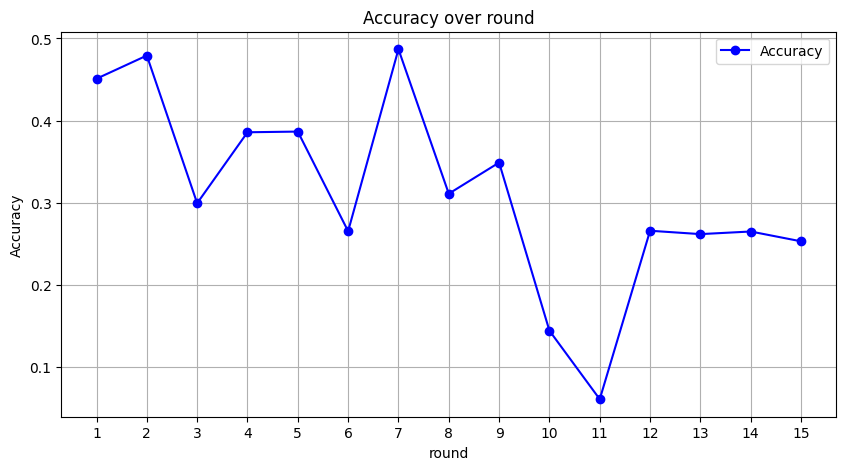

In [16]:
import matplotlib.pyplot as plt

# Danh sách accuracies qua mỗi epoch

# Tạo danh sách các epoch tương ứng
epochs = list(range(1, len(acc) + 1))

# Vẽ đồ thị
plt.figure(figsize=(10, 5))  # Thiết lập kích thước đồ thị
plt.plot(epochs, acc, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy over round')  # Tiêu đề đồ thị
plt.xlabel('round')  # Nhãn trục X
plt.ylabel('Accuracy')  # Nhãn trục Y
plt.xticks(epochs)  # Đánh dấu trục x với các epoch
plt.legend()  # Thêm chú thích
plt.grid(True)  # Thêm lưới
plt.show()  # Hiển thị đồ thị


: 